Imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data

In [57]:
file = pd.ExcelFile("../data/v4/Handball 3. Liga vom 19.12.2022.xlsx")

file.sheet_names

df = file.parse('3. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-1]
df.columns

/Users/nayansavaliya/Desktop/HandballGameAnalysis/hba-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Index(['Heimmannschaft', 'Gastmannschaft', 'Spieltag', 'Name', 'Spielminute',
       'Differenz Pfiff 1 und 2 (in Sekunden)', 'Tore Verein', 'Tore Gegner',
       'Torwartposition (1 = vorne, 2 = hinten)',
       'Wurf erfolgreich (0= Nein, 1 = Ja, 2 = im Nachwurf)',
       'L-R-Händer (1= Rechtshänder; 2= Linkshänder)', 'Wurfrichtung (1-9)?',
       'Drucksituation?\n0 = Nein, 1 = Torwartwechsel\n2 = letzter 7 Meter gehalten\n3 = Tordifferenz =< 4 + ab 50. Spielminute\n4 = 1 + 2, 5 = 1 + 3, 6 = 2 + 3, 7 = 1 + 2 + 3, 8 = letzer 7-Meter erst im Nachwurf erfolgreich',
       'Anzahl 7-Meter im Spiel (der wievielte 7-Meter im Spiel vom Spieler)',
       'Wurfquadrant des letzten 7-Meters (1-9)',
       'letzter 7-Meter erfolgreich \n(1= ja; 0= Nein; 2 = im Nachwurf erfolgreich)?'],
      dtype='object')

Cleanup & Renaming

In [58]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns =[ 'homeTeam','opponentTeam','day','name','playTime',
              'whistleThrowTime','homeGoals','opponentGoals','goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection','pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0


Teamwise Throw stats

                       homeTeam  TotatlThrows  SuccessfulThrows  FailedThrows  \
2    HG Oftersheim/Schwetzingen            13                12             1   
5        SG Köndringen-Teningen            13                12             1   
1   HBW Balingen-Weilstetten II             9                 8             1   
16                 VfL Gladbeck             9                 8             1   
7              SG Leutershausen            32                28             4   
8         SG Pforzheim/Eutingen             8                 7             1   
0         ASV Hamm-Westfalen II             6                 5             1   
15                   TuS Spenge             6                 5             1   
10            TSV GWD Minden II             6                 5             1   
3                   HSG Krefeld            43                35             8   
12                 TV Emsdetten            16                13             2   
4           Longericher SC K

[Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '67.7419'),
 Text(0, 0, '75'),
 Text(0, 0, '80'),
 Text(0, 0, '80'),
 Text(0, 0, '81.25'),
 Text(0, 0, '81.3953'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '87.5'),
 Text(0, 0, '87.5'),
 Text(0, 0, '88.8889'),
 Text(0, 0, '88.8889'),
 Text(0, 0, '92.3077'),
 Text(0, 0, '92.3077')]

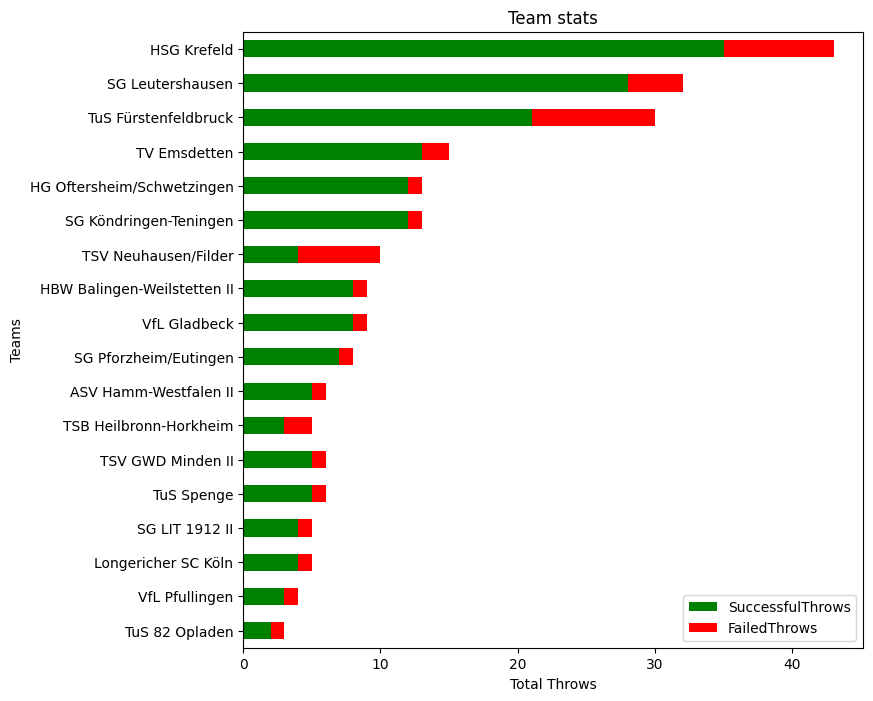

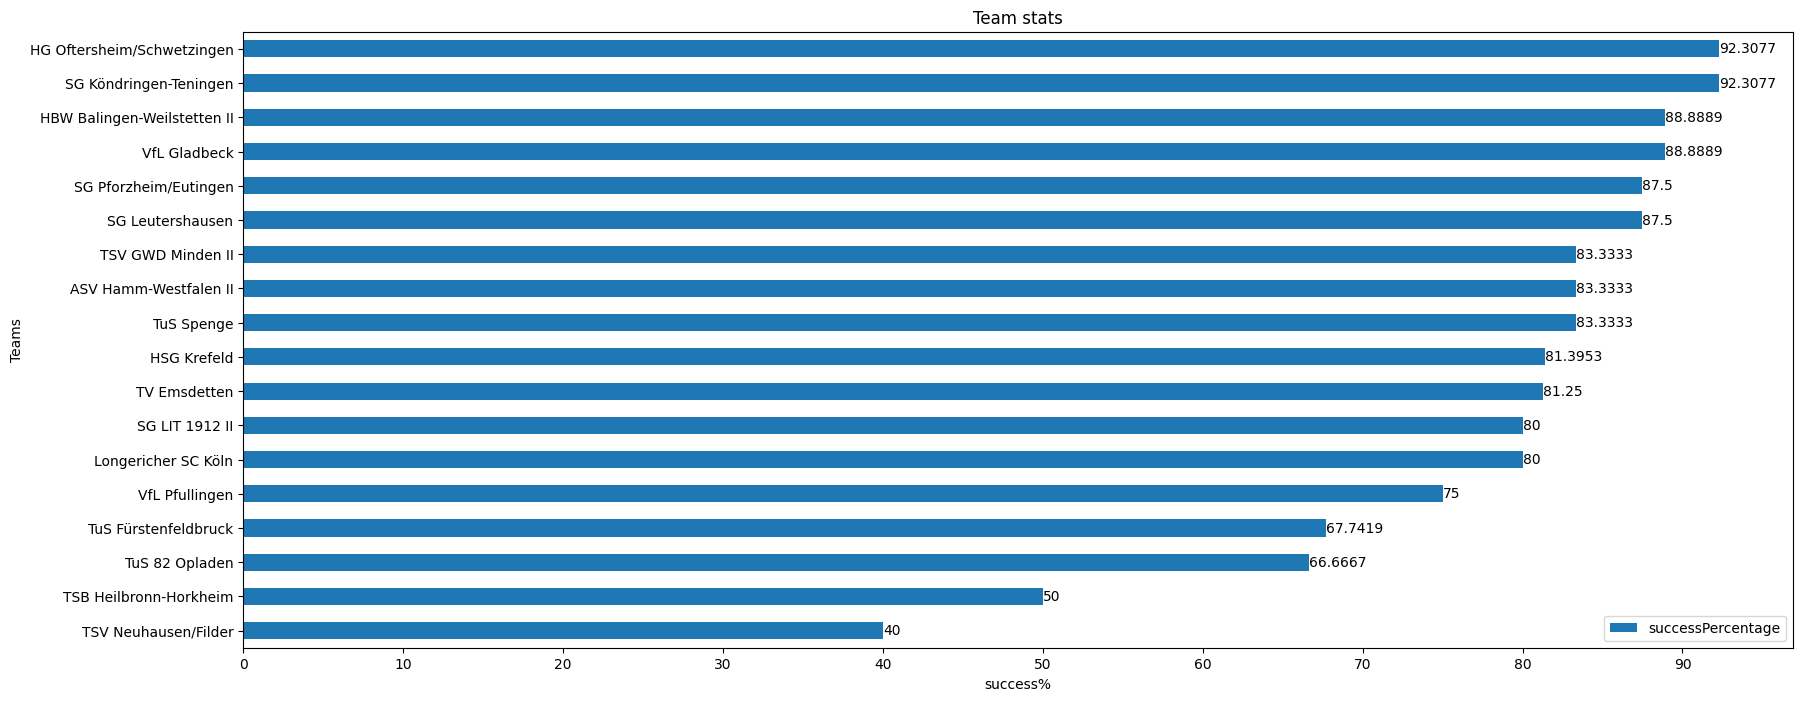

In [59]:
# Teamwise Throw stats
df2 = df.groupby(['homeTeam'])['homeTeam'].count().reset_index(name='TotatlThrows')
df3 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df3 = df3.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="SuccessfulThrows")
df4 = df.loc[(df.throwSuccess == 0)]
df4 = df4.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="FailedThrows")
df5 = pd.merge(df2,df3,on='homeTeam')
df5 = pd.merge(df5,df4,on='homeTeam')
df5['successPercentage'] = (df5['SuccessfulThrows']/df5['TotatlThrows'])*100
print(df5.sort_values('successPercentage',ascending=False))
df5.sort_values('TotatlThrows',ascending=True).set_index('homeTeam')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(8,8) )

ax = df5.sort_values('successPercentage',ascending=True).set_index('homeTeam')[['successPercentage']].plot.barh( title='Team stats',xlabel='success%', ylabel='Teams',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Team & player wise Throw stats

In [60]:
# Team & player wise Throw stats
df6 = df.groupby(['homeTeam','name'])['name'].count().reset_index(name='TotatlThrows')
df7 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df7 = df7.groupby(['homeTeam','name'])['name'].count().reset_index(name="SuccessfulThrows")
df8 = df.loc[(df.throwSuccess == 0)]
df8 = df8.groupby(['homeTeam','name'])['name'].count().reset_index(name="FailedThrows")
df9 = df6.merge(df7,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9 = df9.merge(df8,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df9['successPercentage'] = (df9['SuccessfulThrows']/df9['TotatlThrows'])*100
df9.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df9.sort_values('name',ascending=False))

,homeTeam,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
42,TV Emsdetten,Terhaer,1,1.0,0.0,100.000000
51,TuS Spenge,Terhaer,1,0.0,1.0,0.000000
32,TSV GWD Minden II,Terhaer,4,4.0,0.0,100.000000
6,HC Oppenweiler/Backnang,Stumpf,1,1.0,0.0,100.000000
21,SG Leutershausen,Schmitt,1,0.0,1.0,0.000000
9,HG Oftersheim/Schwetzingen,Riemschneider,1,1.0,0.0,100.000000
48,TuS Fürstenfeldbruck,Riemschneider,7,5.0,2.0,71.428571
38,TSV Neuhausen/Filder,Riemschneider,1,0.0,1.0,0.000000
50,TuS Spenge,Reichmann,1,1.0,0.0,100.000000
15,Rhein Neckar Löwen II,Pauli,5,5.0,0.0,100.000000


Player wise Throw stats

,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
6,Klasmann,11,10,1,90.909091
4,Holzner,34,30,4,88.235294
5,Kerst,40,35,5,87.500000
9,Pauli,65,56,9,86.153846
11,Terhaer,6,5,1,83.333333
1,Brüren,23,19,4,82.608696
8,Noll,36,26,10,72.222222
10,Riemschneider,9,6,3,66.666667
2,Fröhlich,6,3,3,50.000000
3,Haller,2,1,1,50.000000


[Text(0, 0, '33.3333'),
 Text(0, 0, '33.3333'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '72.2222'),
 Text(0, 0, '82.6087'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '86.1538'),
 Text(0, 0, '87.5'),
 Text(0, 0, '88.2353'),
 Text(0, 0, '90.9091')]

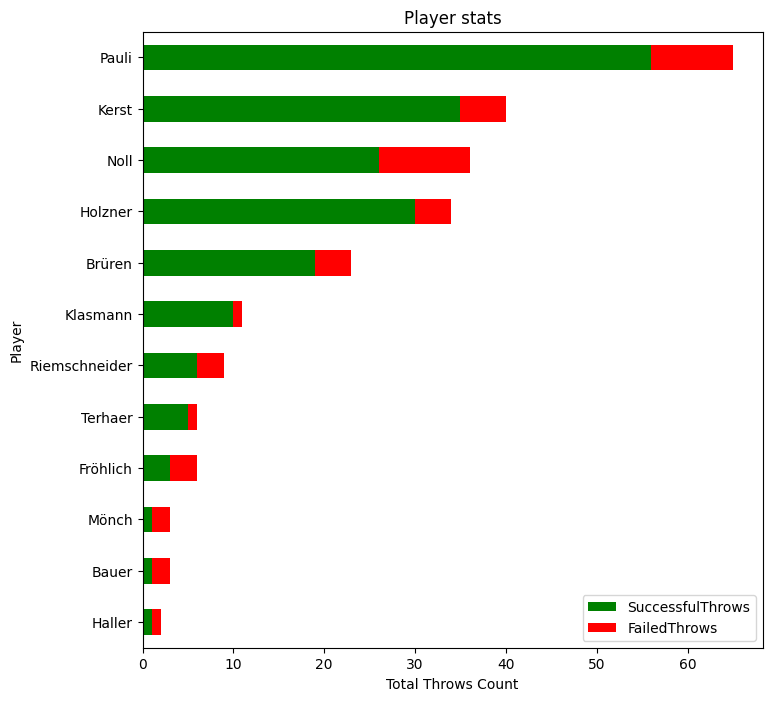

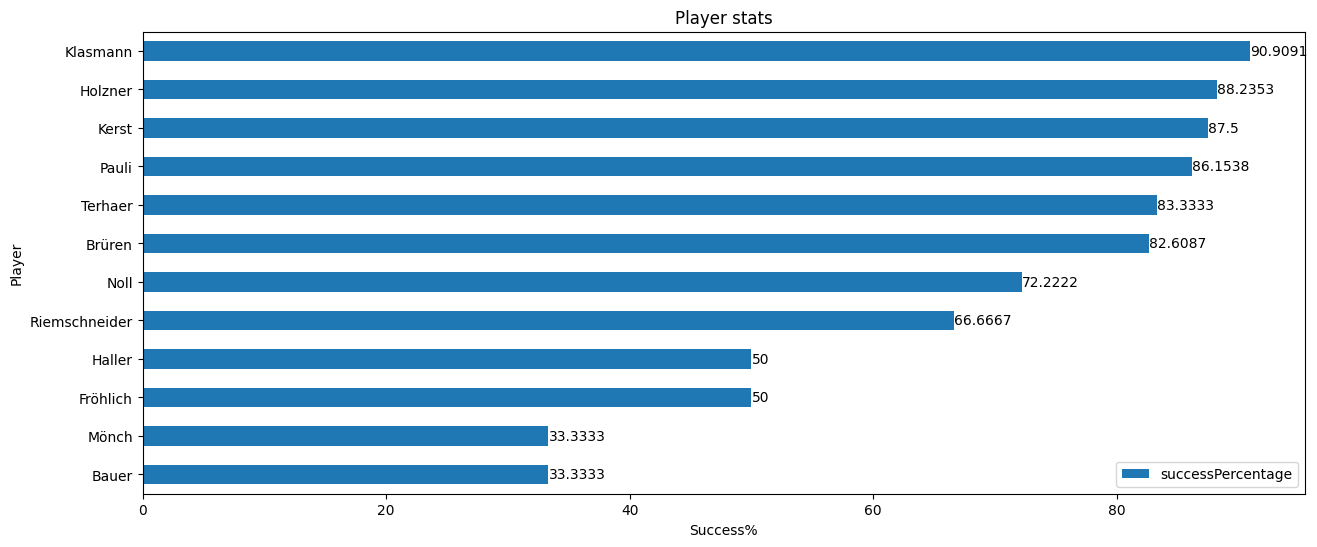

In [61]:
# Player wise Throw stats
df10 = df.groupby(['name'])['name'].count().reset_index(name='TotatlThrows')
df11 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df11 = df11.groupby(['name'])['name'].count().reset_index(name="SuccessfulThrows")
df12 = df.loc[(df.throwSuccess == 0)]
df12 = df12.groupby(['name'])['name'].count().reset_index(name="FailedThrows")
df13 = pd.merge(df10,df11,on=['name'])
df13 = pd.merge(df13,df12,on=['name'])
df13.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df13['successPercentage'] = (df13['SuccessfulThrows']/df13['TotatlThrows'])*100
df13.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df13.sort_values('successPercentage',ascending=False))
    
df13.sort_values('TotatlThrows',ascending=True).set_index('name')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Player stats',color=("green", "red"),xlabel='Total Throws Count', ylabel='Player',figsize=(8,8) )

ax = df13.sort_values('successPercentage',ascending=True).set_index('name')[['successPercentage']].plot.barh( title='Player stats',xlabel='Success%', ylabel='Player',figsize=(15,6) )
ax.bar_label(ax.containers[0])


Throw Success based on lastTrow Success

160
bothSuccess: 119
bothFailed: 2
failedButLastSuccess: 22
successButLastFailed: 17
------------------------------
bothNachwurf: 0
successLastNachwurf: 1
failedLastNachwurf: 0


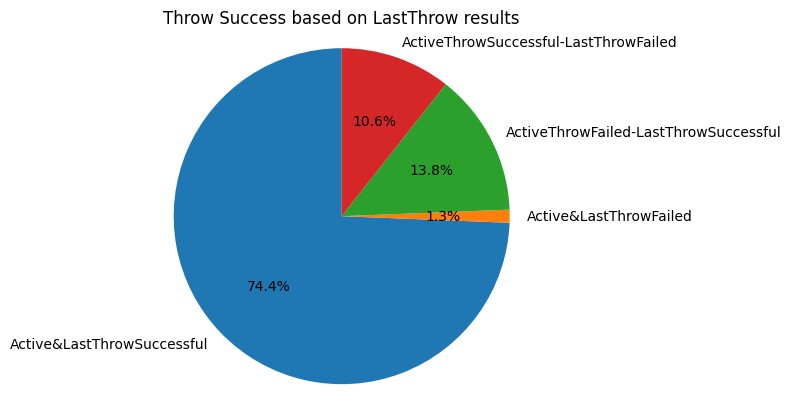

In [62]:
df14 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df14.dropna(inplace=True)
df14.replace(to_replace=2.0, value=1.0, inplace=True)
print(df14.count()[0])
bothSuccess = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 1)].count()[0]
print('bothSuccess: '+ str(bothSuccess))
bothFailed = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 0)].count()[0]
print('bothFailed: '+ str(bothFailed))
failedButLastSuccess = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 1)].count()[0]
print('failedButLastSuccess: '+ str(failedButLastSuccess))    
successButLastFailed = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 0)].count()[0] 
print('successButLastFailed: '+ str(successButLastFailed)) 

print('------------------------------')
df15 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df15.dropna(inplace=True)
bothNachwurf = df15[(df15.throwSuccess == 2) & (df15.lastThrowSuccess == 2)].count()[0]
print('bothNachwurf: '+ str(bothNachwurf))
successLastNachwurf = df15[(df15.throwSuccess == 1) & (df15.lastThrowSuccess == 2)].count()[0]
print('successLastNachwurf: '+ str(successLastNachwurf))
failedLastNachwurf = df15[(df15.throwSuccess == 0) & (df15.lastThrowSuccess == 2)].count()[0]
print('failedLastNachwurf: '+ str(failedLastNachwurf))

labels = ['Active&LastThrowSuccessful','Active&LastThrowFailed','ActiveThrowFailed-LastThrowSuccessful','ActiveThrowSuccessful-LastThrowFailed']
values = [bothSuccess,bothFailed,failedButLastSuccess,successButLastFailed]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Throw Success based on LastThrow results')
plt.show()

Throw analysis fo L-R players

noOfThrowsFromR: 209
noOfThrowsFromL: 36
------------------
successR: 170
successL: 28
failedR: 39
failedL: 8
----------------------
%successR: 81.3397129186603
%successL: 77.77777777777779


[Text(0, 0, '77.7778'), Text(0, 0, '81.3397')]

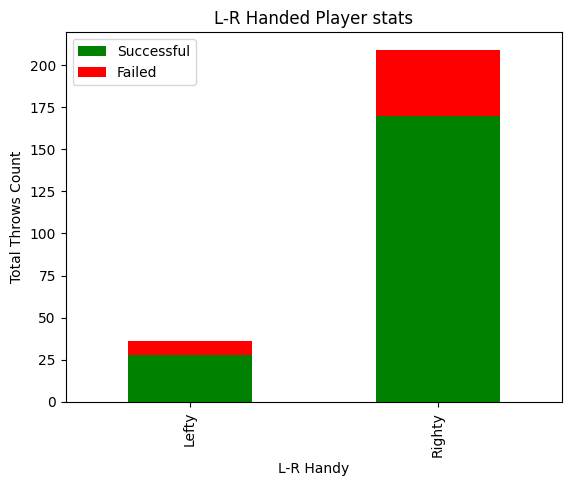

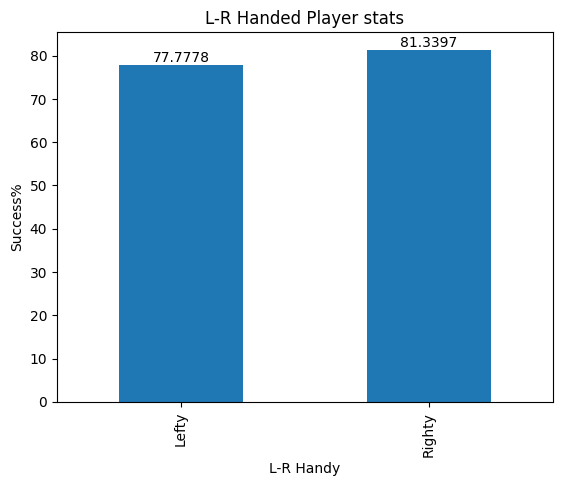

In [63]:
df15 = df.loc[:,('throwSuccess','LRHandy')]
df15.dropna(inplace=True)
df15['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
noOfThrowsFromR = df15[ (df15.LRHandy == 1)].count()[0]
print('noOfThrowsFromR: '+ str(noOfThrowsFromR))
noOfThrowsFromL = df15[ (df15.LRHandy == 2)].count()[0]
print('noOfThrowsFromL: '+ str(noOfThrowsFromL)),

print('------------------')

successR = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 1)].count()[0]
print('successR: '+ str(successR))

successL = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 2)].count()[0]
print('successL: '+ str(successL))

failedR = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 1)].count()[0]
print('failedR: '+ str(failedR))

failedL = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 2)].count()[0]
print('failedL: '+ str(failedL))


print('----------------------')
print('%successR: '+ str((successR/noOfThrowsFromR)*100))
print('%successL: '+ str((successL/noOfThrowsFromL)*100))

lrdf = pd.DataFrame({'L-R Handy':['Righty','Lefty'],'TotalThrows':[noOfThrowsFromR,noOfThrowsFromL],
                     'Successful':[successR,successL],
                     'Failed':[failedR,failedL],
                     'Success%':[(successR/noOfThrowsFromR)*100,(successL/noOfThrowsFromL)*100]})

lrdf.sort_values('TotalThrows',ascending=True).set_index('L-R Handy')[['Successful','Failed']].plot.bar(stacked=True, title='L-R Handed Player stats',color=("green", "red"), ylabel='Total Throws Count')

ax = lrdf.sort_values('Success%',ascending=True).set_index('L-R Handy')[['Success%']].plot.bar( title='L-R Handed Player stats',ylabel='Success%' ,legend=False)
ax.bar_label(ax.containers[0])

Throw Analysis based on pressure situation

                                    pressureSituation  throwSuccess  Count
0                               No Pressure Situation           0.0     39
1                               No Pressure Situation           1.0    129
2                                    GoalKeeperChange           0.0      4
3                                    GoalKeeperChange           1.0     27
4                                     LastThrowFailed           0.0      1
5                                     LastThrowFailed           1.0     13
6                  GoalDiffLessEqualTo4After50MinPlay           0.0      2
7                  GoalDiffLessEqualTo4After50MinPlay           1.0     14
8                    GoalKeeperChange-LastThrowFailed           1.0      6
9   GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           0.0      1
10  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           1.0      3
11  LastThrowFailed-GoalDiffLessEqualTo4After50Min...           0.0      1
12  LastThrowFailed-GoalD

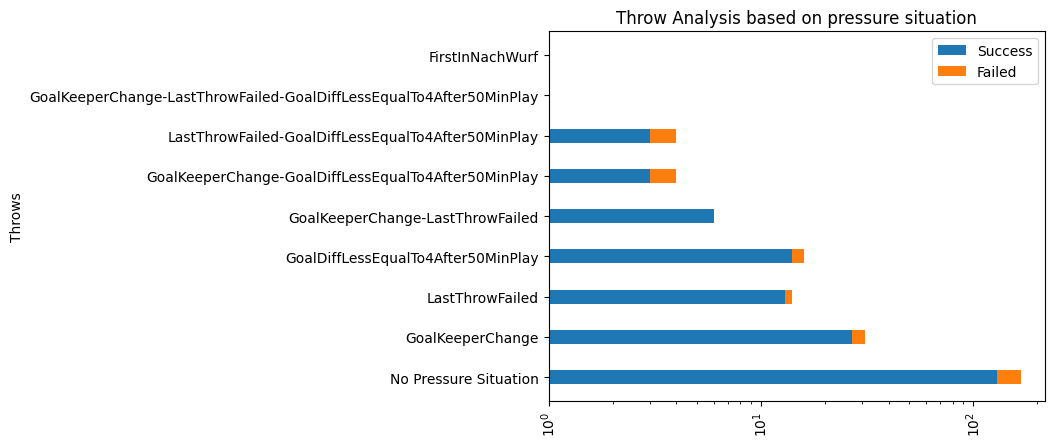

In [64]:
df16 = df.loc[:,('pressureSituation','throwSuccess')]
df16['throwSuccess'].replace(2,1, inplace=True)
df16.dropna(inplace=True)
df16 = df16.groupby(['pressureSituation','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df16

X = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']

for val in df16['pressureSituation']:
     df16['pressureSituation'].replace(val,X[int(val)], inplace=True)


print(df16)
grp = df16['pressureSituation'].unique()
s = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 1.0)]
     if tempdf.empty:
          s.append(0.0)
     else:
          s.append(tempdf.iloc[0,2])
f = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 0.0)]
     if tempdf.empty:
          f.append(0)
     else:
          f.append(tempdf.iloc[0,2])
t = list()
for g in grp:
     t.append(df16[(df16.pressureSituation == g)]['Count'].sum())


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(grp, s, width,  label='Success')
ax.barh(grp, f, width,  left=s,
       label='Failed')

ax.set_ylabel('Throws')
ax.set_xscale('log')
ax.set_title('Throw Analysis based on pressure situation')
ax.legend()
plt.xticks(rotation=90)
plt.show()

                                   PressureSituation  successPercentage
0                              No Pressure Situation          76.785714
1                                   GoalKeeperChange          87.096774
2                                    LastThrowFailed          92.857143
3                 GoalDiffLessEqualTo4After50MinPlay          87.500000
4                   GoalKeeperChange-LastThrowFailed         100.000000
5  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...          75.000000
6  LastThrowFailed-GoalDiffLessEqualTo4After50Min...          75.000000
7  GoalKeeperChange-LastThrowFailed-GoalDiffLessE...         100.000000
8                                    FirstInNachWurf         100.000000


[Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '76.7857'),
 Text(0, 0, '87.0968'),
 Text(0, 0, '87.5'),
 Text(0, 0, '92.8571'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100')]

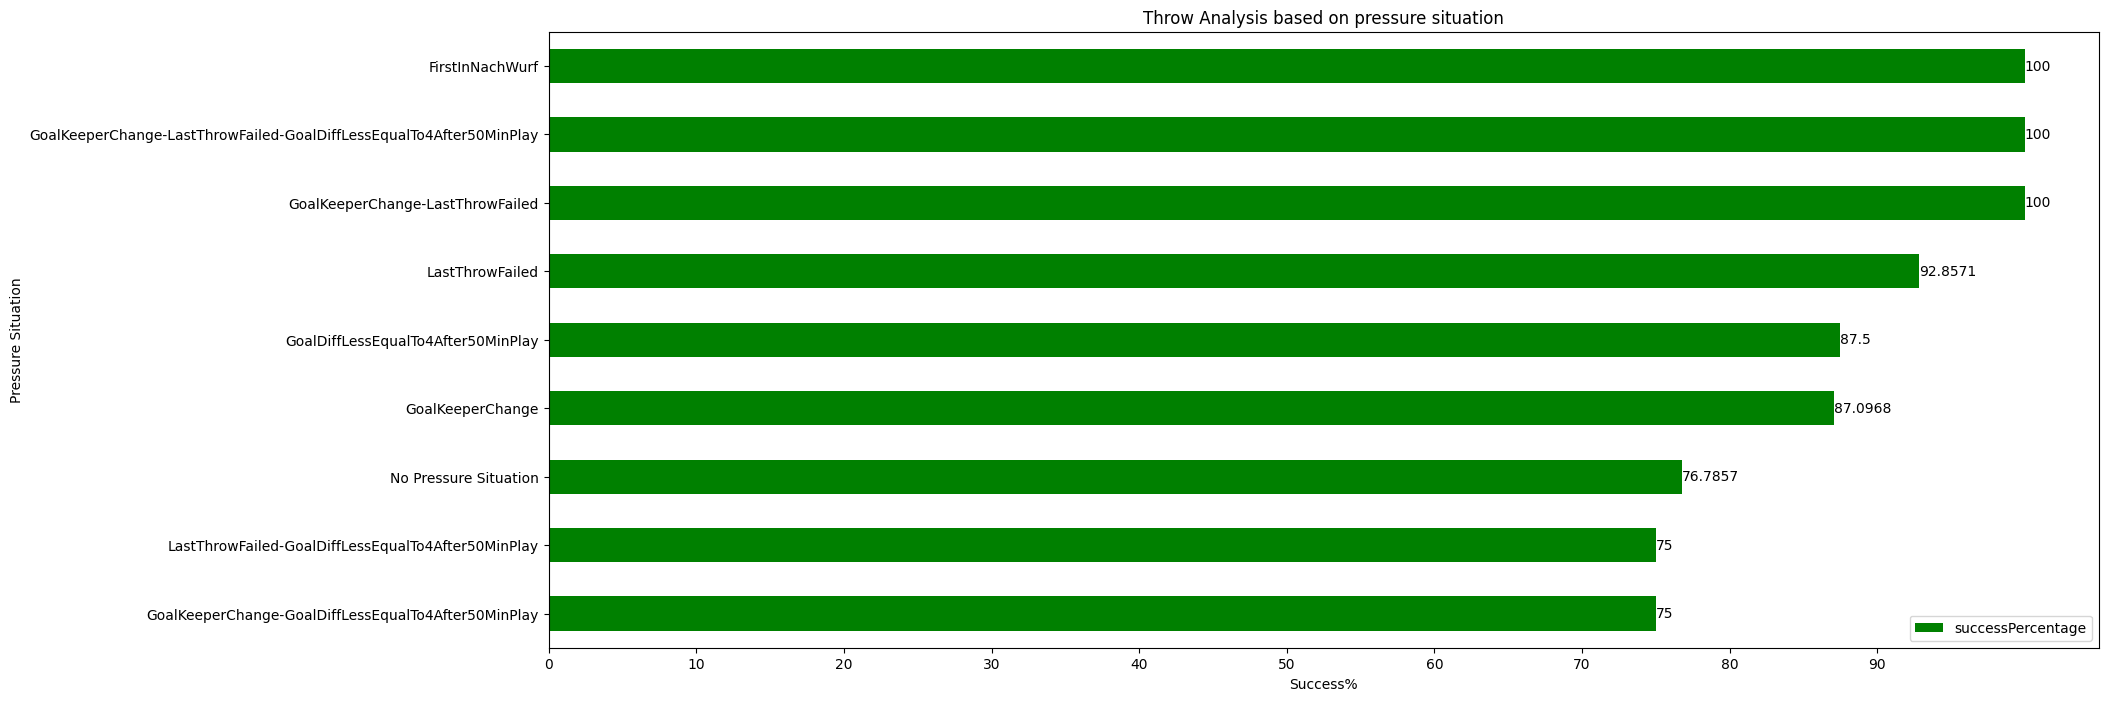

In [65]:

pressureSituation = pd.DataFrame({'PressureSituation':grp,'successPercentage':[(se/te)*100 for se, te in zip(s, t)]})
print(pressureSituation)
ax = pressureSituation.sort_values('successPercentage',ascending=True).set_index('PressureSituation')[['successPercentage']].plot.barh( title='Throw Analysis based on pressure situation',color=("green", "red"),xlabel='Success%', ylabel='Pressure Situation',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Throw Direction

,throwDirection,throwSuccess,Count
0,1.0,0.0,3
1,1.0,1.0,20
2,2.0,0.0,2
3,2.0,1.0,4
4,3.0,0.0,5
5,3.0,1.0,38
6,4.0,0.0,3
7,4.0,1.0,6
9,5.0,1.0,3
8,5.0,0.0,3


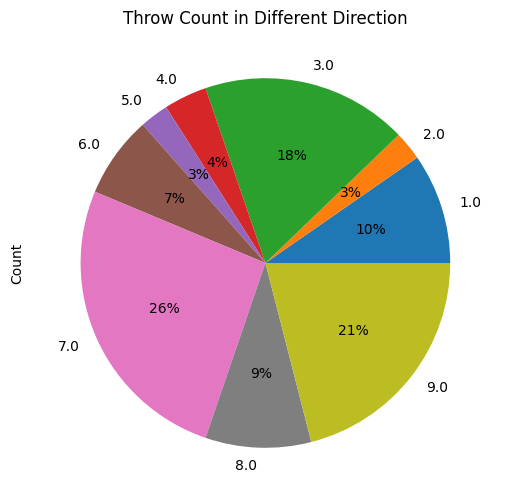

In [66]:


df17 = df.loc[:,('throwDirection','throwSuccess')]
df17.dropna(inplace=True)
df17['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
df18 = df17.copy()
df18 = df18.groupby(['throwDirection'])['throwSuccess'].count().reset_index(name='Count')
df18.set_index('throwDirection').plot.pie(y='Count', figsize=(6, 6), title='Throw Count in Different Direction',autopct='%.0f%%',legend=None)
df17 = df17.groupby(['throwDirection','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df17.sort_values(['throwDirection'],ascending=True,inplace=True)
df17

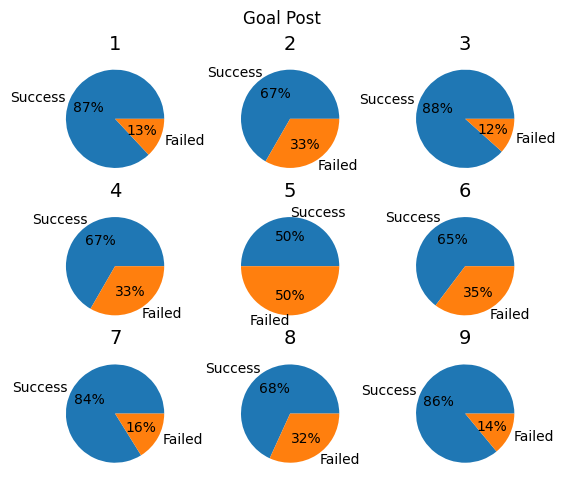

In [67]:
# Some data
labels = 'Success', 'Failed'

# Make figure and axes
fig, axs = plt.subplots(3, 3)
fig.suptitle('Goal Post')
axs[0, 0].pie([20,3], labels=labels, autopct='%.0f%%' )
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].pie([4,2], labels=labels, autopct='%.0f%%')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].pie([38,5], labels=labels,  autopct='%.0f%%')
axs[0, 2].set_title('3', fontsize=14)

axs[1, 0].pie([6,3], labels=labels, autopct='%.0f%%')
axs[1, 0].set_title('4', fontsize=14)
axs[1, 1].pie([3,3], labels=labels,  autopct='%.0f%%')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].pie([11,6], labels=labels, autopct='%.0f%%')
axs[1, 2].set_title('6', fontsize=14)

axs[2, 0].pie([52,10], labels=labels,  autopct='%.0f%%')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].pie([15,7], labels=labels, autopct='%.0f%%')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].pie([43,7], labels=labels,  autopct='%.0f%%')
axs[2, 2].set_title('9', fontsize=14)
plt.subplots_adjust(bottom=0.01, right=0.9)